In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from scipy.stats import gaussian_kde

In [21]:
def add_counts_to_heatmap(ax, x_edges, y_edges, hist):
    for i in range(len(x_edges) - 1):
        for j in range(len(y_edges) - 1):
            ax.text(x_edges[i] + 0.5 * (x_edges[1] - x_edges[0]), 
                    y_edges[j] + 0.5 * (y_edges[1] - y_edges[0]), 
                    str(int(hist[i, j])), 
                    color="black", ha="center", va="center")

In [74]:
def draw_gaze(num_samples, percent_sets):
    range_sets = [[-30,-15],
                  [-15,0],
                  [0,15],
                  [15,30]]
    all_samples = []
    for pitch_num, pitch_range_set in enumerate(range_sets):
        for yaw_num, yaw_range_set in enumerate(range_sets):
            
            pitch_min = pitch_range_set[0]
            pitch_max = pitch_range_set[1]
            yaw_min = yaw_range_set[0]
            yaw_max = yaw_range_set[1]
            precent = precent_sets[pitch_num][yaw_num]
            num_samples_range = int(num_samples * precent)
            # print(pitch_num,yaw_num, num_samples_range)
            range_pitch_yaw = np.column_stack([
                np.random.uniform(pitch_min, pitch_max, (num_samples_range)),
                np.random.uniform(yaw_min, yaw_max, (num_samples_range))
            ])

            # print(range_roll_pitch_yaw)
            # 각 범위의 데이터를 합침
            # print(range_pitch_yaw)
            all_samples.append(range_pitch_yaw)
    
    # print(all_samples)
    pitch_yaw_data = np.vstack(all_samples)
    fig, ax = plt.subplots(1, 1, figsize=(6, 8))
    
    pitch = pitch_yaw_data[:, 0]
    yaw = pitch_yaw_data[:, 1]
    # print(pitch, yaw)
    # pitch 값과 yaw 값에 대한 2차원 히스토그램
    
    hist, x_edges, y_edges = np.histogram2d(yaw, pitch, bins=12, range=[[-30, 30],[-30, 30]])
    ax.imshow(hist.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], origin='lower', cmap='Blues', norm=LogNorm())
    ax.set_xlabel('Yaw')
    ax.set_ylabel('Pitch')
    add_counts_to_heatmap(ax, x_edges, y_edges, hist)

    plt.subplots_adjust(hspace=0.3)  # 서브 플롯 간의 수직 간격 조정
    # plt.savefig(save_name)
    # print(len(pitch))
    # print(len(pitch_yaw_data))

    plt.show()

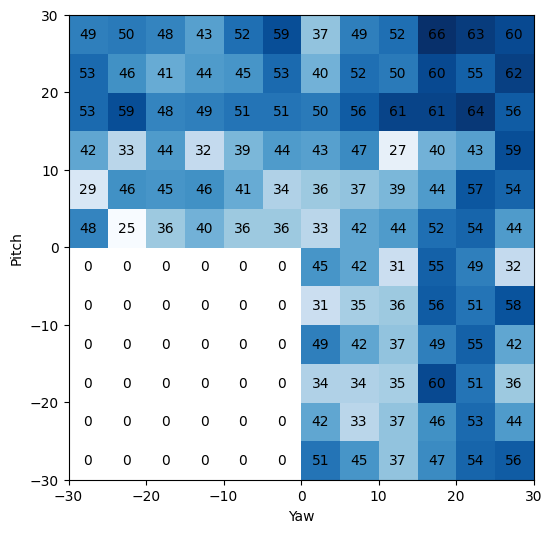

In [77]:
precent_sets = [[0.000, 0.000, 0.070, 0.090],
                [0.000, 0.000, 0.070, 0.090],
                [0.070, 0.070, 0.070, 0.090],
                [0.090, 0.090, 0.090, 0.110]]

draw_gaze(4975,precent_sets)

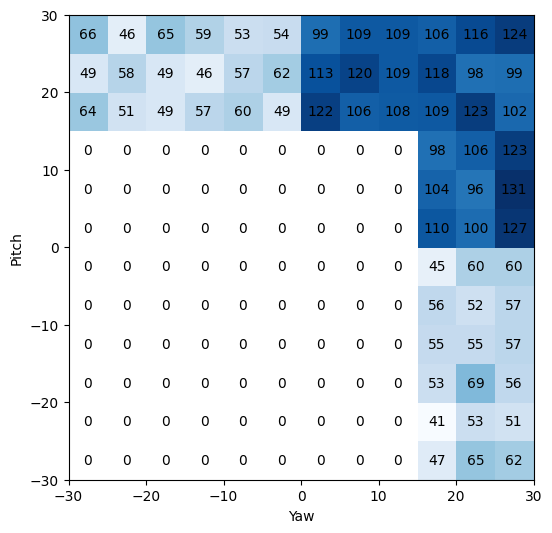

In [79]:
precent_sets = [[0.00, 0.00, 0.00, 0.10],
                [0.00, 0.00, 0.00, 0.10],
                [0.00, 0.00, 0.00, 0.20],
                [0.10, 0.10, 0.20, 0.20]]

draw_gaze(4975,precent_sets)